## Project 2020
### Fundamentals of Data Analysis
### Student: Aine Nic Dhonnacha
### Lecturer: Ian Mc loughlin

This project performs and explains simple linear regression using Python on the powerproduction dataset below. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.


###### The data set url "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
   The data set was provided by Ian Mc Loughlin on moodle. 

In [1]:
#Importing pandas as pd to read the dataset url:
import pandas as pd
url ="https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url)


In [2]:
#testing it is reading the data set correctly
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


Pandas has many built in functions that can assist in analysing dataframes such as those used below; 
[1](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [3]:
# find the mean
df.mean()


speed    12.590398
power    48.014584
dtype: float64

In [4]:
#for more detail, describe the data set
df.describe()


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The Std (standard deviation) and the 50% gives an indiction how far away your values were from the mean.  If the data points are further from the mean, there is a higher deviation within the data set; the more spread out the data, the higher the standard deviation. [2](https://www.investopedia.com/terms/s/standarddeviation.asp)

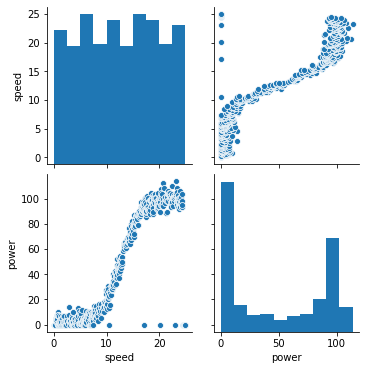

In [5]:
import seaborn as sns
sns.pairplot(df)



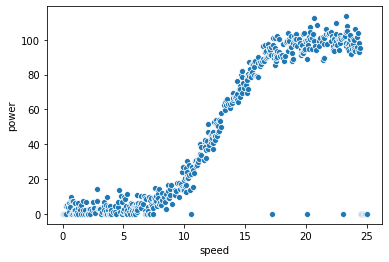

In [6]:
sns.scatterplot(data = df, x = 'speed', y = 'power');


In [7]:
#import numpy as np
#np.linspace(0.0, 30.0, 500)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222E42EFCD0>,
      dtype=object)

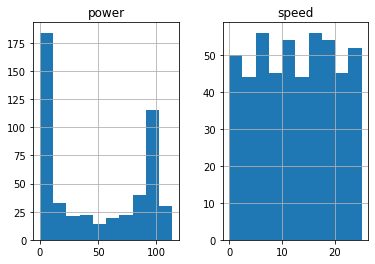

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df.hist()



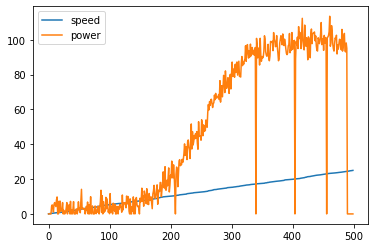

In [9]:
df.plot()


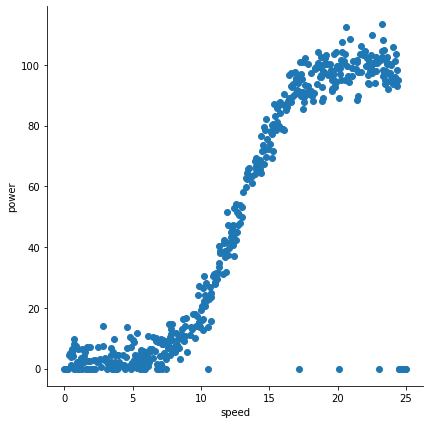

In [10]:
from pandas.plotting import scatter_matrix
sns.FacetGrid(df,  height=6).map(plt.scatter, "speed", "power").add_legend()